Let's see if we can get options data for AAPL.

Free APIs I found:
https://eodhistoricaldata.com/financial-apis/stock-options-data/

GET this address, (demo key is enough for now):

https://eodhistoricaldata.com/api/options/AAPL.US?api_token=OeAFFmMliFG5orCUuwAKQ8l4WWFQ67YX


In [1]:
%matplotlib inline
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# using pre downloaded response json file, can be retrieved like this:

#requests.get("https://eodhistoricaldata.com/api/options/AAPL.US?api_token=OeAFFmMliFG5orCUuwAKQ8l4WWFQ67YX").json()

In [3]:
response = pd.read_json('response.json')
response.head()

,code,exchange,lastTradeDate,lastTradePrice,data
0,AAPL,US,2022-03-29,178.96,"{'expirationDate': '2022-04-01', 'impliedVolat..."
1,AAPL,US,2022-03-29,178.96,"{'expirationDate': '2022-04-08', 'impliedVolat..."
2,AAPL,US,2022-03-29,178.96,"{'expirationDate': '2022-04-14', 'impliedVolat..."
3,AAPL,US,2022-03-29,178.96,"{'expirationDate': '2022-04-22', 'impliedVolat..."
4,AAPL,US,2022-03-29,178.96,"{'expirationDate': '2022-04-29', 'impliedVolat..."


In [4]:
front_week = pd.DataFrame(response.loc[0]['data'])
front_week

,expirationDate,impliedVolatility,putVolume,callVolume,putCallVolumeRatio,putOpenInterest,callOpenInterest,putCallOpenInterestRatio,optionsCount,options
CALL,2022-04-01,29.4067,204464,314491,0.650143,157201,195312,0.804871,95,"[{'contractName': 'AAPL220401C00105000', 'cont..."
PUT,2022-04-01,29.4067,204464,314491,0.650143,157201,195312,0.804871,95,"[{'contractName': 'AAPL220401P00105000', 'cont..."


In [5]:
front_week_calls = pd.DataFrame(front_week.loc['CALL']['options'])
front_week_calls.head()

,contractName,contractSize,contractPeriod,currency,type,inTheMoney,lastTradeDateTime,expirationDate,strike,lastPrice,...,delta,gamma,theta,vega,rho,theoretical,intrinsicValue,timeValue,updatedAt,daysBeforeExpiration
0,AAPL220401C00105000,REGULAR,WEEKLY,USD,CALL,TRUE,2022-03-23 10:22:03,2022-04-01,105.0,65.14,...,0.9737,0.0012,-0.3807,0.0112,0,71.150,0,0,2022-03-28 18:54:33,3
1,AAPL220401C00110000,REGULAR,WEEKLY,USD,CALL,TRUE,2022-03-23 12:03:27,2022-04-01,110.0,61.88,...,0.9951,0.0006,-0.0577,0.0026,0,65.650,0,0,2022-03-28 18:54:33,3
2,AAPL220401C00115000,REGULAR,WEEKLY,USD,CALL,TRUE,2022-03-23 11:14:37,2022-04-01,115.0,57.38,...,0.9742,0.0015,-0.3026,0.0110,0,61.025,0,0,2022-03-28 18:54:33,3
3,AAPL220401C00120000,REGULAR,WEEKLY,USD,CALL,TRUE,2022-03-28 09:35:31,2022-04-01,120.0,53.73,...,0.9964,0.0006,-0.0328,0.0019,0,55.625,0,0,2022-03-28 18:54:33,3
4,AAPL220401C00125000,REGULAR,WEEKLY,USD,CALL,TRUE,2022-03-23 15:12:34,2022-04-01,125.0,46.52,...,0.9376,0.0029,-0.6459,0.0226,0,51.850,0,0,2022-03-28 18:54:33,3


In [6]:
front_week_calls.columns

Index(['contractName', 'contractSize', 'contractPeriod', 'currency', 'type',
       'inTheMoney', 'lastTradeDateTime', 'expirationDate', 'strike',
       'lastPrice', 'bid', 'ask', 'change', 'changePercent', 'volume',
       'openInterest', 'impliedVolatility', 'delta', 'gamma', 'theta', 'vega',
       'rho', 'theoretical', 'intrinsicValue', 'timeValue', 'updatedAt',
       'daysBeforeExpiration'],
      dtype='object')

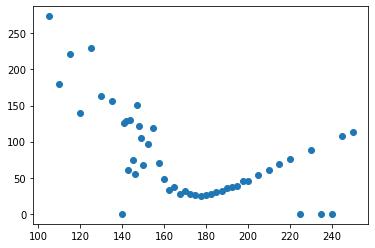

In [7]:
plt.scatter(front_week_calls['strike'], front_week_calls['impliedVolatility'])

Kind of a smirk, kind of weird. Want to figure out what's going on with the outliers.

Maybe the front_month_calls will be less weird.

In [8]:
front_month_calls = pd.DataFrame(pd.DataFrame(response.loc[2]['data']).loc['CALL']['options'])
front_month_calls.head()

,contractName,contractSize,contractPeriod,currency,type,inTheMoney,lastTradeDateTime,expirationDate,strike,lastPrice,...,delta,gamma,theta,vega,rho,theoretical,intrinsicValue,timeValue,updatedAt,daysBeforeExpiration
0,AAPL220414C00050000,REGULAR,MONTHLY,USD,CALL,TRUE,2022-03-28 12:04:39,2022-04-14,50.0,123.50,...,0.9889,0.0003,-0.0934,0.0109,0,126.100,0,0,2022-03-28 18:54:34,16
1,AAPL220414C00055000,REGULAR,MONTHLY,USD,CALL,TRUE,2022-03-28 12:04:39,2022-04-14,55.0,118.50,...,0.9984,0.0001,-0.0099,0.0018,0,120.625,0,0,2022-03-28 18:54:34,16
2,AAPL220414C00060000,REGULAR,MONTHLY,USD,CALL,TRUE,2022-03-28 12:04:39,2022-04-14,60.0,93.55,...,0.0000,0.0000,0.0000,0.0000,0,0.000,0,0,2022-03-28 18:54:34,16
3,AAPL220414C00065000,REGULAR,MONTHLY,USD,CALL,TRUE,2022-03-07 14:39:06,2022-04-14,65.0,96.65,...,0.9954,0.0002,-0.0271,0.0050,0,110.700,0,0,2022-03-28 18:54:34,16
4,AAPL220414C00070000,REGULAR,MONTHLY,USD,CALL,TRUE,2022-03-08 13:28:06,2022-04-14,70.0,90.30,...,0.9882,0.0004,-0.0697,0.0116,0,105.950,0,0,2022-03-28 18:54:34,16


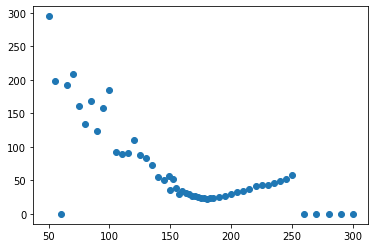

In [9]:
plt.scatter(front_month_calls['strike'], front_month_calls['impliedVolatility'])

A bit cleaner maybe. Maybe there's a good way to know if a data point is dodgy ahead of time, e.g. maybe it was last traded a long time ago. I don't know yet how the API has calculated the implied volatilities.

In [10]:
front_month_calls['updatedAt']

0     2022-03-28 18:54:34
1     2022-03-28 18:54:34
2     2022-03-28 18:54:34
3     2022-03-28 18:54:34
4     2022-03-28 18:54:34
5     2022-03-28 18:54:34
6     2022-03-28 18:54:34
7     2022-03-28 18:54:34
8     2022-03-28 18:54:34
9     2022-03-28 18:54:34
10    2022-03-28 18:54:34
11    2022-03-28 18:54:34
12    2022-03-28 18:54:34
13    2022-03-28 18:54:34
14    2022-03-28 18:54:34
15    2022-03-28 18:54:34
16    2022-03-28 18:54:34
17    2022-03-28 18:54:34
18    2022-03-28 18:54:34
19    2022-03-28 18:54:34
20    2022-03-28 18:54:34
21    2022-03-28 18:54:34
22    2022-03-28 18:54:34
23    2022-03-28 18:54:34
24    2022-03-28 18:54:34
25    2022-03-28 18:54:34
26    2022-03-28 18:54:34
27    2022-03-28 18:54:34
28    2022-03-28 18:54:34
29    2022-03-28 18:54:34
30    2022-03-28 18:54:34
31    2022-03-28 18:54:45
32    2022-03-28 18:54:34
33    2022-03-28 18:54:34
34    2022-03-28 18:54:34
35    2022-03-28 18:54:34
36    2022-03-28 18:54:34
37    2022-03-28 18:54:34
38    2022-0

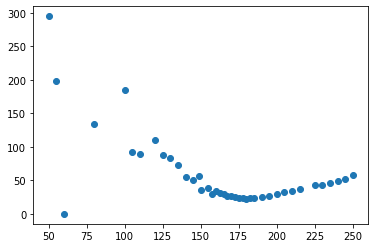

In [11]:
traded_recently = front_month_calls[front_month_calls['lastTradeDateTime'] >= '2022-03-28']
plt.scatter(traded_recently['strike'], traded_recently['impliedVolatility'])

So the ITM options are weird (the deeper the weirder), but I've heard that these are the ones that are least traded ≈ least important.

In [12]:
filtered = traded_recently[traded_recently['strike'] >= 160]

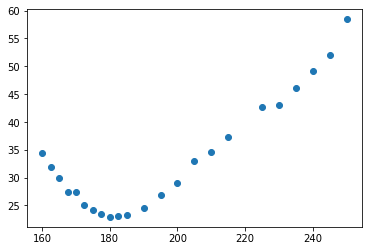

In [13]:
plt.scatter(filtered['strike'], filtered['impliedVolatility'])

Good enough to do some cubic spline interpolation.

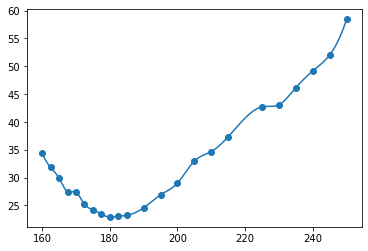

In [14]:
from scipy.interpolate import CubicSpline
import numpy as np

cs = CubicSpline(filtered['strike'], filtered['impliedVolatility'])
x_range = np.arange(160, 250, 0.1)
plt.scatter(filtered['strike'], filtered['impliedVolatility'])
plt.plot(x_range, cs(x_range), label='Cubic Spline')

Not too shabby.

## TODO

- There's probably a simpler way to filter the data, look at volume perhaps? Good visualisation tool to help with this: scatterplots w cmap.
- If not, there are defo ways to smooth out /denoise the data.
- Figure out how the API calculates the implied volatilities.
- Better API?